In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#한글 폰트 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
#csv 파일 불러오기
for_stay = pd.read_csv('법무부_외국인체류데이터_20191231.csv', encoding='cp949')
for_stay.head()

,대륙,국적,성별,D-1(문화예술),D-2(유학),D-3(기술연수),D-4(일반연수),D-5(취재),D-6(종교),D-7(주재),...,E-10(선원취업),F-1(방문동거),F-2(거주),F-3(동반),F-5(영주),F-6(결혼이민),G-1(기타),H-1(관광취업),H-2(방문취업),기타(other)
0,아시아주,한국계중국인,남성,1.0,465.0,80.0,130.0,1.0,1.0,12.0,...,1.0,9474.0,5207.0,18.0,47026.0,6693.0,162.0,NaN,117420.0,5.0
1,아시아주,한국계중국인,여성,1.0,682.0,59.0,112.0,NaN,NaN,1.0,...,NaN,10679.0,5729.0,35.0,41833.0,10683.0,70.0,NaN,75235.0,3.0
2,아시아주,중국,남성,10.0,22044.0,375.0,4651.0,10.0,11.0,246.0,...,2601.0,14275.0,6863.0,551.0,11234.0,4467.0,2779.0,NaN,16.0,272.0
3,아시아주,중국,여성,6.0,37619.0,253.0,5082.0,11.0,28.0,79.0,...,1.0,22374.0,10856.0,1163.0,22213.0,19586.0,1325.0,NaN,17.0,268.0
4,아시아주,베트남,남성,2.0,8120.0,81.0,20420.0,NaN,37.0,26.0,...,8030.0,13180.0,1187.0,474.0,372.0,2691.0,672.0,NaN,NaN,108.0


# **1. 데이터 전처리**

In [4]:
#NaN값 0으로 채우기
for_stay = for_stay.fillna(0)

#대륙, 국적, 성별 칼럼 제거
for_stay = for_stay.drop(['대륙', '국적', '성별'], axis=1)

#값을 정수(int)형으로 변환
for_stay = for_stay.astype(int)

#칼럼명 정제
for_stay.columns = ['문화예술','유학','기술연수','일반연수','취재', '종교', '주재', '기업투자', '무역경영',
              '구직', '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', 
              '비전문취업', '선원취업', '방문동거', '거주', '동반', '영주', '결혼이민', '기타_1', '관광취업', '방문취업', '기타_2']

#[기타_1]과 [기타_2]를 [기타]로 병합
for_stay['기타'] = for_stay['기타_1']+for_stay['기타_2']
for_stay = for_stay.drop(['기타_1', '기타_2'], axis=1)

for_stay.head()

,문화예술,유학,기술연수,일반연수,취재,종교,주재,기업투자,무역경영,구직,...,비전문취업,선원취업,방문동거,거주,동반,영주,결혼이민,관광취업,방문취업,기타
0,1,465,80,130,1,1,12,35,2,0,...,352,1,9474,5207,18,47026,6693,0,117420,167
1,1,682,59,112,0,0,1,19,2,0,...,257,0,10679,5729,35,41833,10683,0,75235,73
2,10,22044,375,4651,10,11,246,764,109,899,...,1989,2601,14275,6863,551,11234,4467,0,16,3051
3,6,37619,253,5082,11,28,79,221,33,1404,...,274,1,22374,10856,1163,22213,19586,0,17,1593
4,2,8120,81,20420,0,37,26,20,5,271,...,32979,8030,13180,1187,474,372,2691,0,0,780


In [5]:
#칼럼명 확인
for_stay.columns

Index(['문화예술', '유학', '기술연수', '일반연수', '취재', '종교', '주재', '기업투자', '무역경영', '구직',
       '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', '비전문취업', '선원취업',
       '방문동거', '거주', '동반', '영주', '결혼이민', '관광취업', '방문취업', '기타'],
      dtype='object')

In [6]:
#리스트에 칼럼 저장
columns = ['문화예술', '유학', '기술연수', '일반연수', '취재', '종교', '주재', '기업투자', '무역경영', '구직',
       '교수', '회화강사', '연구', '기술지도', '전문직업', '예술흥행', '특정활동', '비전문취업', '선원취업',
       '방문동거', '거주', '동반', '영주', '결혼이민', '관광취업', '방문취업', '기타']

#각 칼럼의 합계 도출
sum = for_stay[columns].sum()
sum

문화예술         59
유학       117415
기술연수       1280
일반연수      59526
취재           89
종교         1523
주재         1375
기업투자       5875
무역경영       2320
구직         5412
교수         2183
회화강사      13798
연구         3109
기술지도        219
전문직업        606
예술흥행       3231
특정활동      20997
비전문취업    270751
선원취업      17131
방문동거     120962
거주        43403
동반        22414
영주       153038
결혼이민     129200
관광취업       2948
방문취업     223513
기타        49430
dtype: int64

In [7]:
#새 데이터프레임 생성
for_stay_new = pd.DataFrame()

#칼럼명 지정, sum으로 값 지정
for_stay_new['응답수'] = sum

#인덱스를 '체류요인'이라는 칼럼으로 변경
for_stay_new = for_stay_new.rename_axis('체류요인').reset_index()
for_stay_new

,체류요인,응답수
0,문화예술,59
1,유학,117415
2,기술연수,1280
3,일반연수,59526
4,취재,89
5,종교,1523
6,주재,1375
7,기업투자,5875
8,무역경영,2320
9,구직,5412


# **2. 데이터 시각화**

1) 모든 체류요인

In [8]:
#그래프 크기 설정
plt.rcParams['figure.figsize'] = (10, 8)

#폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [137]:
cmap = plt.get_cmap('Purples')
colors = cmap([1,20,30,40,50,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130,140,150,160,170,180,200])

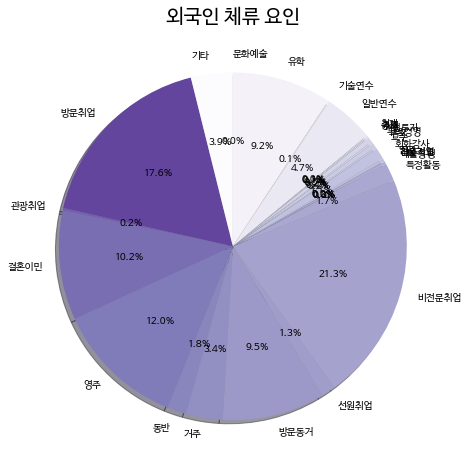

In [138]:
#원그래프 그리기
plt.title('외국인 체류 요인',fontsize = 20)
plt.pie(for_stay_new['응답수'], labels = for_stay_new['체류요인'], autopct = '%1.1f%%',colors = colors,
        startangle=90, shadow=True, counterclock=False)

#텍스트가 겹치지 않도록


plt.show()

2) 체류요인이 노동인 항목 강조

방문 취업
:중국 및 구소련 지역에 거주하는 만 25세 이상의 외국 국적 동포가 정해진 기간 동안 한국에서 자유롭게 취업하는 일

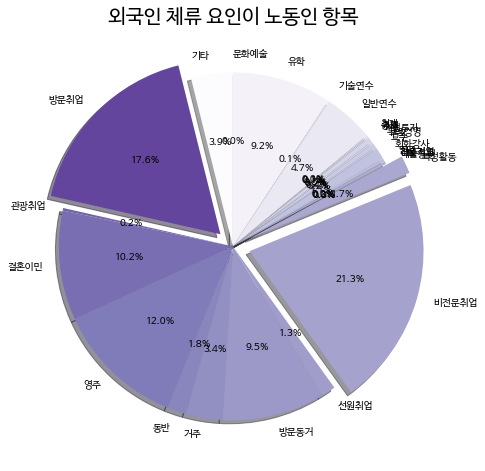

In [139]:
#원그래프 그리기
plt.title('외국인 체류 요인이 노동인 항목',fontsize = 20)
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0,0,0,0,0,0,0,0.1,0]

plt.pie(for_stay_new['응답수'], labels = for_stay_new['체류요인'], autopct = '%1.1f%%',colors = colors,
        startangle=90, explode=explode, shadow=True, counterclock=False)

#텍스트가 겹치지 않도록


plt.show()